In [6]:
import pandas as pd # to read/manipulate/write data from files
import numpy as np # to manipulate data/generate random numbers
import plotly.express as px # interactive visualizations
import seaborn as sns # static visualizations
import matplotlib.pyplot as plt # fine tune control over visualizations

from pathlib import Path # represent and interact with directories/folders in the operating system
from collections import namedtuple # structure data in an easy to consume way

import requests # retrieve data from an online source

In [7]:
data_path = Path("/home/jovyan/ABCD3")
files = sorted(data_path.glob("*.txt"))
data_elements = []
data_structures = {}
event_names = set()
StructureInfo = namedtuple("StructureInfo", field_names=["description", "eventnames"])

for text_file in files:
    data_structure = Path(text_file).name.split('.txt')[0]
    data_structure_df = pd.read_table(text_file, header=[0, 1], nrows=0)
    for data_element, metadata in data_structure_df.columns.values.tolist():
        data_elements.append([data_element, metadata, data_structure])
    events_in_structure = None
    if any(['eventname' == data_element for data_element in data_structure_df.columns.levels[0]]):
        # Here we are skipping the 2nd row of the file containing description using skiprows
        possible_event_names_df = pd.read_table(text_file, skiprows=[1], usecols=['eventname'])
        events_in_structure = possible_event_names_df.eventname.unique().tolist()
        event_names.update(events_in_structure)
    rinfo = requests.get(f"https://nda.nih.gov/api/datadictionary/datastructure/{data_structure}").json()
    data_structures[data_structure] = StructureInfo(description=rinfo["title"] if "title" in rinfo else None,eventnames=events_in_structure)

# Convert to a Pandas dataframe
data_elements_df = pd.DataFrame(data_elements, columns=["element", "description", "structure"])

In [8]:
data_elements_df.head()

element                                        description  \
0    collection_id                                      collection_id   
1  abcd_abcls01_id                                    abcd_abcls01_id   
2       dataset_id                                         dataset_id   
3       subjectkey  The NDAR Global Unique Identifier (GUID) for r...   
4   src_subject_id         Subject ID how it's defined in lab/project   

      structure  
0  abcd_abcls01  
1  abcd_abcls01  
2  abcd_abcls01  
3  abcd_abcls01  
4  abcd_abcls01

In [9]:
data_elements_df.to_csv("data_elements.tsv", sep="\t", index=None)

In [12]:
data_elements_df.shape

(75221, 3)

In [13]:
len(data_structures)

295

In [14]:
event_names

{'18_month_follow_up_arm_1',
 '1_year_follow_up_y_arm_1',
 '2_year_follow_up_y_arm_1',
 '30_month_follow_up_arm_1',
 '6_month_follow_up_arm_1',
 'baseline_year_1_arm_1',
 'screener_arm_1'}

In [15]:
data_elements_df.element.unique().shape

(72013,)

In [16]:
data_elements_df.query("element == 'smri_vol_scs_amygdalalh'")

element                               description  \
30612  smri_vol_scs_amygdalalh  Volume in mm^3 of ASEG ROI left-amygdala   

           structure  
30612  abcd_smrip201

In [17]:
structure = 'abcd_mri01'  # 'abcd_psb01'
example_structure_df = pd.read_table(data_path / f"{structure}.txt", header=[0, 1], nrows=0)
example_structure_df.columns.tolist()

[('collection_id', 'collection_id'),
 ('abcd_mri01_id', 'abcd_mri01_id'),
 ('dataset_id', 'dataset_id'),
 ('subjectkey',
  'The NDAR Global Unique Identifier (GUID) for research subject'),
 ('src_subject_id', "Subject ID how it's defined in lab/project"),
 ('interview_date',
  'Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY'),
 ('interview_age',
  'Age in months at the time of the interview/test/sampling/imaging.'),
 ('sex', 'Sex of the subject'),
 ('eventname', 'The event name for which the data was collected'),
 ('mri_info_visitid', 'Visit name'),
 ('mri_info_manufacturer', 'Imaging device manufacturer'),
 ('mri_info_manufacturersmn', "Imaging device manufacturer's model name"),
 ('mri_info_deviceserialnumber',
  'Hashed version of imaging device serial number'),
 ('mri_info_magneticfieldstrength',
  'Magnetic field strength of imaging device in teslas'),
 ('mri_info_softwareversion', 'Imaging device software version'),
 ('mri_info_stu

In [18]:
NOEVENTS = {}
for data_structure, info in data_structures.items():
    if info.eventnames:
        if 'baseline_year_1_arm_1' in info.eventnames:
            print(f"{data_structure}: {info.description}")
    else:
        NOEVENTS[data_structure] = info

abcd_ant01: ABCD Youth Anthropometrics Modified From PhenX (ANT)
abcd_asrs01: ABCD Parent Adult Self Report Scores Aseba (ASR)
abcd_auto_postqc01: Automated Post-Processing QC Metrics
abcd_betnet02: ABCD rsfMRI Gordon Network Correlations
abcd_bisbas01: ABCD Youth Behavioral Inhibition/Behavioral Approach System Scales Modified from PhenX (BIS/BAS)
abcd_bpmt01: ABCD Brief Problem Monitor-Teacher Form For Ages 6-18 (BPMT)
abcd_cbcl01: ABCD Parent Child Behavior Checklist Raw Scores Aseba (CBCL)
abcd_cbcls01: ABCD Parent Child Behavior Checklist Scores Aseba (CBCL)
abcd_crpf01: ABCD Parent Community Risk and Protective Factors (CRPF)
abcd_ddtidp101: ABCD dMRI DTI Destrieux Parcellations Part 1
abcd_ddtidp201: ABCD dMRI DTI Destrieux Parcellations Part 2
abcd_ddtifp101: ABCD dMRI DTI Full Destrieux Parcellation Part 1
abcd_ddtifp201: ABCD dMRI DTI Full Destrieux Parcellation Part 2
abcd_devhxss01: ABCD Summary Scores Developmental History
abcd_dmdtifp101: ABCD dMRI DTI Full Part 1
abcd_dm

In [19]:
for data_structure, info in NOEVENTS.items():
    print(f"{data_structure}: {info.description}")

aurora01: Mobile Data
dhx01: ABCD Developmental History Questionnaire
fhxp201: ABCD Family History Assessment Part 2
fmriresults01: Processed MRI Data
guid_pseudoguid: None
omics_experiments: None
package_info: None
pps01: ABCD Prodromal Psychosis Scale
sph01: ABCD Pubertal Hormone Saliva
srpf01: ABCD School Risk and Protective Factors Survey


In [41]:
common = ["subjectkey", "interview_date", "interview_age", "eventname", "sex"]
demographic = ["site_id_l", "anthroheightcalc", "anthroweightcalc", "anthro_waist_cm", 'neighborhood_crime_y']
clinical = ['cbcl_scr_syn_attention_t', 'cbcl_scr_syn_internal_t', 'cbcl_scr_dsm5_depress_t', 'cbcl_scr_dsm5_anxdisord_t', 'pps_y_ss_severity_score']
behavioral = ['abcl_q123_p', 'prosocial_q3_y', 'upps27_y', 'physical_activity1_y', 'prosocial_q1_y'] # 'fit_ss_sleepperiod_minutes', 'fit_ss_avg_hr_deep',
cognitive = ['cash_choice_task', 'tfmri_sst_all_beh_crs_rt', 'nihtbx_flanker_agecorrected', 'nihtbx_cardsort_agecorrected', 'strp_scr_acc_incongr']
imaging = ["dmri_dtifa_fiberat_scslh", "dmri_dtifa_fiberat_scsrh", 'mri_info_manufacturer', 'midabwdp15', 'midabwdp37']

data_elements_of_interest = demographic + clinical + behavioral + cognitive + imaging

In [42]:
print(data_elements_of_interest)

['site_id_l', 'anthroheightcalc', 'anthroweightcalc', 'anthro_waist_cm', 'neighborhood_crime_y', 'cbcl_scr_syn_attention_t', 'cbcl_scr_syn_internal_t', 'cbcl_scr_dsm5_depress_t', 'cbcl_scr_dsm5_anxdisord_t', 'pps_y_ss_severity_score', 'abcl_q123_p', 'prosocial_q3_y', 'upps27_y', 'physical_activity1_y', 'prosocial_q1_y', 'cash_choice_task', 'tfmri_sst_all_beh_crs_rt', 'nihtbx_flanker_agecorrected', 'nihtbx_cardsort_agecorrected', 'strp_scr_acc_incongr', 'dmri_dtifa_fiberat_scslh', 'dmri_dtifa_fiberat_scsrh', 'mri_info_manufacturer', 'midabwdp15', 'midabwdp37']


In [43]:
structures2read = {}
for element in data_elements_of_interest:
    item = data_elements_df.query(f"element == '{element}'").structure.values[0]
    if item not in structures2read:
        structures2read[item] = []
    structures2read[item].append(element)
structures2read

{'abcd_lt01': ['site_id_l'],
 'abcd_ant01': ['anthroheightcalc', 'anthroweightcalc', 'anthro_waist_cm'],
 'abcd_nsc01': ['neighborhood_crime_y'],
 'abcd_cbcls01': ['cbcl_scr_syn_attention_t',
  'cbcl_scr_syn_internal_t',
  'cbcl_scr_dsm5_depress_t',
  'cbcl_scr_dsm5_anxdisord_t'],
 'abcd_mhy02': ['pps_y_ss_severity_score'],
 'abcd_adbc01': ['abcl_q123_p'],
 'abcd_psb01': ['prosocial_q3_y', 'prosocial_q1_y'],
 'abcd_upps01': ['upps27_y'],
 'abcd_yrb01': ['physical_activity1_y'],
 'cct01': ['cash_choice_task'],
 'abcd_sst02': ['tfmri_sst_all_beh_crs_rt'],
 'abcd_tbss01': ['nihtbx_flanker_agecorrected',
  'nihtbx_cardsort_agecorrected'],
 'abcd_yest01': ['strp_scr_acc_incongr'],
 'abcd_dti_p101': ['dmri_dtifa_fiberat_scslh', 'dmri_dtifa_fiberat_scsrh'],
 'abcd_mri01': ['mri_info_manufacturer'],
 'abcd_midabwdp01': ['midabwdp15', 'midabwdp37']}

In [44]:
example_df = pd.read_table(data_path / f"{list(structures2read)[0]}.txt", skiprows=[1], low_memory=False,
                  usecols=common + structures2read[list(structures2read)[0]])
example_df.head()

subjectkey interview_date  interview_age sex  \
0  NDAR_INV007W6H7B     02/21/2017            126   M   
1  NDAR_INV00BD7VDC     04/24/2019            123   M   
2  NDAR_INV00CY2MDM     01/16/2018            135   M   
3  NDAR_INV00J52GPG     09/11/2019            122   M   
4  NDAR_INV00LH735Y     06/26/2019            126   M   

                  eventname site_id_l  
0     baseline_year_1_arm_1    site22  
1  1_year_follow_up_y_arm_1    site07  
2   6_month_follow_up_arm_1    site20  
3  1_year_follow_up_y_arm_1    site17  
4  18_month_follow_up_arm_1    site03

In [71]:
all_df = None
for structure, elements in structures2read.items():
    data_structure_filtered_df = pd.read_table(data_path / f"{structure}.txt", skiprows=[1], low_memory=False, usecols=common + elements)
    data_structure_filtered_df = data_structure_filtered_df.query("eventname == 'baseline_year_1_arm_1'")
    if all_df is None:
        all_df =  data_structure_filtered_df[["subjectkey", "interview_date", "interview_age", "sex"] + elements]
    else:
        all_df = all_df.merge( data_structure_filtered_df[['subjectkey'] + elements], how='outer')

In [72]:
all_df.head()

subjectkey interview_date  interview_age sex site_id_l  \
0  NDAR_INV007W6H7B     02/21/2017            126   M    site22   
1  NDAR_INV00LH735Y     01/29/2018            109   M    site03   
2  NDAR_INV014RTM1V     05/02/2017            115   M    site17   
3  NDAR_INV0182J779     06/25/2018            111   F    site06   
4  NDAR_INV01NAYMZH     08/09/2017            129   M    site16   

   anthroheightcalc  anthroweightcalc  anthro_waist_cm  neighborhood_crime_y  \
0             56.50              82.8            26.75                   4.0   
1             52.00              80.0            30.00                   5.0   
2             55.35              89.2            25.00                   5.0   
3             54.00              74.0            28.00                   5.0   
4             60.50              91.0            28.00                   5.0   

   cbcl_scr_syn_attention_t  ...  cash_choice_task  tfmri_sst_all_beh_crs_rt  \
0                      53.0  ...               2.0                  0.566667   
1                      50.0  ...               1.0                  0.466667   
2                      50.0  ...               2.0                       NaN   
3                      59.0  ...               2.0                       NaN   
4                      51.0  ...               2.0                  0.550000   

   nihtbx_flanker_agecorrected  nihtbx_cardsort_agecorrected  \
0                         92.0                         103.0   
1                         88.0                          81.0   
2                         88.0                         100.0   
3                         88.0                          90.0   
4                         83.0                         103.0   

   strp_scr_acc_incongr  dmri_dtifa_fiberat_scslh  dmri_dtifa_fiberat_scsrh  \
0                   NaN                  0.476779                  0.521380   
1                   NaN                  0.447491                  0.483579   
2                   NaN                  0.463299                  0.472307   
3                   NaN                  0.418093                  0.439412   
4                   NaN                  0.483712                  0.509633   

     mri_info_manufacturer  midabwdp15  midabwdp37  
0       GE MEDICAL SYSTEMS   -0.091621    0.077823  
1                  SIEMENS   -0.174100   -0.167248  
2  Philips Medical Systems         NaN         NaN  
3                  SIEMENS   -0.608748    0.059459  
4                  SIEMENS    0.026859   -0.286794  

[5 rows x 29 columns]

In [73]:
all_df.shape, all_df.subjectkey.unique().shape

((11883, 29), (11878,))

In [74]:
all_df[all_df.duplicated('subjectkey', keep=False)]

subjectkey interview_date  interview_age sex site_id_l  \
1636   NDAR_INV3E0WVH3G     11/21/2017            131   M    site11   
1637   NDAR_INV3E0WVH3G     11/21/2017            131   M    site11   
6053   NDAR_INV2ZA2LC3N     12/10/2017            131   M    site09   
6054   NDAR_INV2ZA2LC3N     12/10/2017            131   M    site09   
7279   NDAR_INVXN6HMGK8     09/06/2017            120   M    site11   
7280   NDAR_INVXN6HMGK8     09/06/2017            120   M    site11   
8252   NDAR_INVJ9GNXGK5     12/29/2017            109   M    site21   
8253   NDAR_INVJ9GNXGK5     12/29/2017            109   M    site21   
10235  NDAR_INVWE1DE80Z     09/06/2017            120   M    site11   
10236  NDAR_INVWE1DE80Z     09/06/2017            120   M    site11   

       anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
1636              55.50              96.8             27.0   
1637              55.50              96.8             27.0   
6053              56.50              81.5             25.0   
6054              56.50              81.5             25.0   
7279              53.00              83.8             27.0   
7280              53.00              83.8             27.0   
8252              57.35             117.2             32.0   
8253              57.35             117.2             32.0   
10235             55.50              92.0             29.0   
10236             55.50              92.0             29.0   

       neighborhood_crime_y  cbcl_scr_syn_attention_t  ...  cash_choice_task  \
1636                    4.0                      64.0  ...               2.0   
1637                    4.0                      64.0  ...               2.0   
6053                    5.0                      50.0  ...               1.0   
6054                    5.0                      50.0  ...               1.0   
7279                    5.0                      50.0  ...               2.0   
7280                    5.0                      50.0  ...               2.0   
8252                    5.0                      55.0  ...               2.0   
8253                    5.0                      55.0  ...               2.0   
10235                   5.0                      50.0  ...               2.0   
10236                   5.0                      50.0  ...               2.0   

       tfmri_sst_all_beh_crs_rt  nihtbx_flanker_agecorrected  \
1636                   0.533333                         74.0   
1637                   0.533333                         74.0   
6053                        NaN                          NaN   
6054                        NaN                          NaN   
7279                   0.533333                         83.0   
7280                   0.533333                         83.0   
8252                   0.433333                         97.0   
8253                   0.433333                         97.0   
10235                  0.533333                         92.0   
10236                  0.533333                         92.0   

       nihtbx_cardsort_agecorrected  strp_scr_acc_incongr  \
1636                           86.0                   NaN   
1637                           86.0                   NaN   
6053                            NaN                   NaN   
6054                            NaN                   NaN   
7279                           86.0                   NaN   
7280                           86.0                   NaN   
8252                          100.0                   NaN   
8253                          100.0                   NaN   
10235                          86.0                   NaN   
10236                          86.0                   NaN   

       dmri_dtifa_fiberat_scslh  dmri_dtifa_fiberat_scsrh  \
1636                   0.409814                  0.434889   
1637                   0.409814                  0.434889   
6053                   0.446428                  0.473241   
6054                   0.446428               

In [78]:
N = 1000
indices = np.random.choice(np.arange(all_df.shape[0]), replace=False, size=N)
subset_df = all_df.iloc[indices, :]
subset_df.shape

(1000, 29)

In [81]:
subset_df.describe(include="all")

subjectkey interview_date  interview_age   sex site_id_l  \
count               1000           1000    1000.000000  1000      1000   
unique              1000            505            NaN     2        22   
top     NDAR_INVHDX0L5M7     10/21/2017            NaN     M    site16   
freq                   1              7            NaN   517        84   
mean                 NaN            NaN     119.323000   NaN       NaN   
std                  NaN            NaN       7.368783   NaN       NaN   
min                  NaN            NaN     107.000000   NaN       NaN   
25%                  NaN            NaN     113.000000   NaN       NaN   
50%                  NaN            NaN     119.000000   NaN       NaN   
75%                  NaN            NaN     126.000000   NaN       NaN   
max                  NaN            NaN     132.000000   NaN       NaN   

        anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
count         997.000000        996.000000       996.000000   
unique               NaN               NaN              NaN   
top                  NaN               NaN              NaN   
freq                 NaN               NaN              NaN   
mean           55.372202         82.135987        26.400612   
std             3.101275         22.600017         4.204603   
min            42.000000         27.000000        17.500000   
25%            53.500000         67.200000        23.500000   
50%            55.000000         77.000000        25.500000   
75%            57.000000         91.000000        28.500000   
max            74.000000        197.000000        61.000000   

        neighborhood_crime_y  cbcl_scr_syn_attention_t  ...  cash_choice_task  \
count             999.000000               1000.000000  ...        999.000000   
unique                   NaN                       NaN  ...               NaN   
top                      NaN                       NaN  ...               NaN   
freq                     NaN                       NaN  ...               NaN   
mean                4.055055                 53.971000  ...          1.631632   
std                 1.100179                  6.167025  ...          0.518631   
min                 1.000000                 50.000000  ...          1.000000   
25%                 3.000000                 50.000000  ...          1.000000   
50%                 4.000000                 51.000000  ...          2.000000   
75%                 5.000000                 55.000000  ...          2.000000   
max                 5.000000                 90.000000  ...          3.000000   

        tfmri_sst_all_beh_crs_rt  nihtbx_flanker_agecorrected  \
count                 857.000000                   992.000000   
unique                       NaN                          NaN   
top                          NaN                          NaN   
freq                         NaN                          NaN   
mean                    0.509841                    96.002016   
std                     0.104390                    13.595497   
min                     0.016667                    65.000000   
25%                     0.500000                    88.000000   
50%                     0.533333                    97.000000   
75%                     0.550000                   107.000000   
max                     1.000000                   154.000000   

        nihtbx_cardsort_agecorrected  strp_scr_acc_incongr  \
count                     991.000000                   0.0   
unique                           NaN                   NaN   
top                              NaN                   NaN   
freq                             NaN                   NaN   
mean                       97.037336                   NaN   
std                        15.360372                   NaN   
min                        68.000000                   NaN   
25%                        86.000000                   NaN   
50%                        94.000000                   N

In [82]:
subset_df.to_csv("subset_df.tsv", sep="\t", index=None)

Question 2d 1: A regression plot between brain imaging variable and clinical variable that are both continuous 

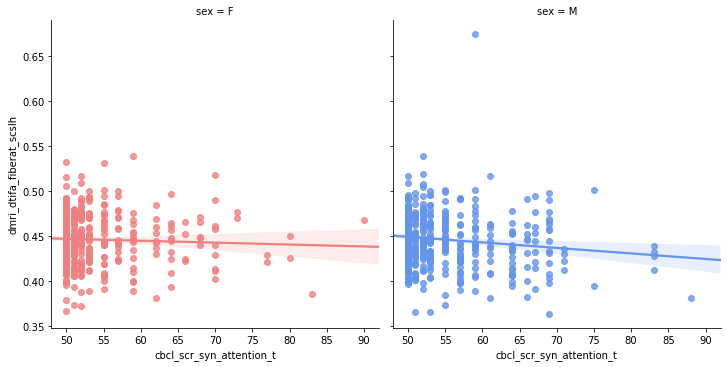

In [83]:
# Make a custom palette with gendered colors
# Note: this is equivalent to {"M": "#6495ED", "F": "#F08080"}
pal = dict(M="#6495ED", F="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x='cbcl_scr_syn_attention_t', y='dmri_dtifa_fiberat_scslh', col="sex", hue="sex", data=subset_df,
               palette=pal, y_jitter=.02, logistic=False, truncate=False)

### Display relations between 4 variables color coded by a categorical variable

Choose sex as your group variable and one variable from each of the four categories
(demographic, clinical, behavioral, imaging)

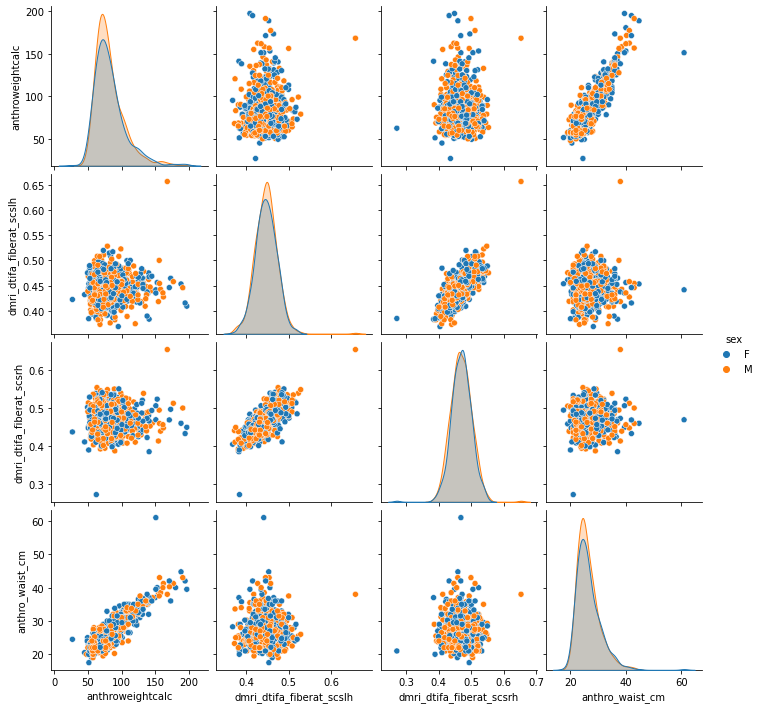

In [84]:
sns.pairplot(subset_df, hue="sex", vars=["anthroweightcalc", "dmri_dtifa_fiberat_scslh", "dmri_dtifa_fiberat_scsrh", 'anthro_waist_cm']);

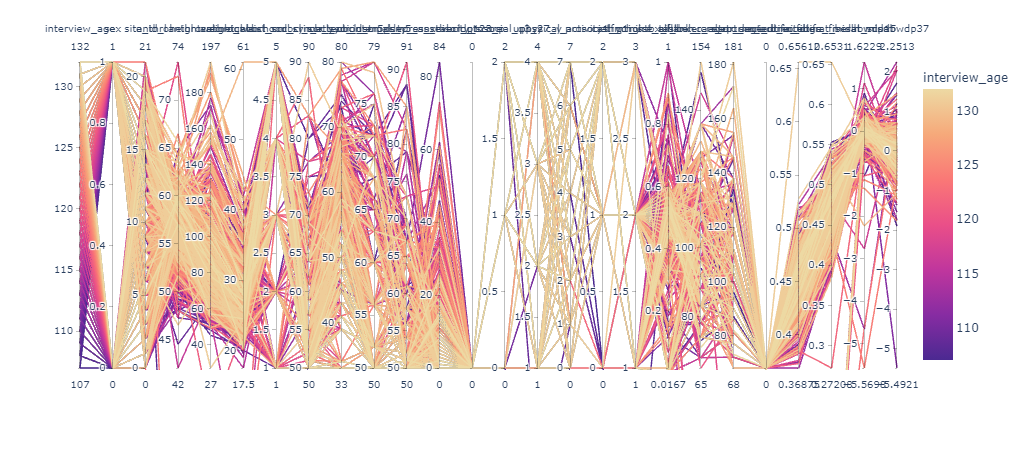

In [85]:
# Create an interactive parallel coordinate plot
subset_df_numerical = subset_df.copy()
subset_df_numerical.sex = subset_df.sex.astype("category").cat.codes
subset_df_numerical.site_id_l = subset_df.site_id_l.astype("category").cat.codes
fig = px.parallel_coordinates(subset_df_numerical, color="interview_age", 
                              dimensions=["interview_age", "sex"] + data_elements_of_interest,
                              color_continuous_scale=px.colors.sequential.Agsunset,)
                              #color_continuous_midpoint=2)
fig.show()

In [ ]:
Plotting distributions: A violin plot grouped by sex. (Grouped violinplots with split violins — seaborn 0.11.0 documentation)

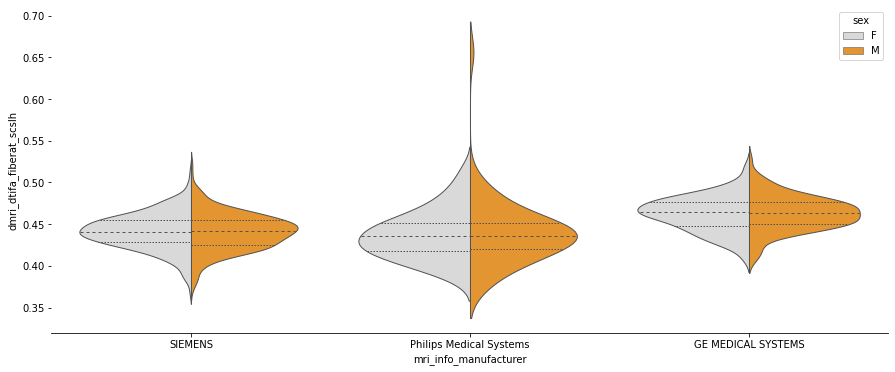

In [86]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=subset_df, x="mri_info_manufacturer", y="dmri_dtifa_fiberat_scslh", hue="sex",
               split=True, inner="quart", linewidth=1,
               palette={"M": "#FF9914", "F": ".85"})
sns.despine(left=True)

SyntaxError: invalid syntax (<ipython-input-87-a2ee7ff71e07>, line 1)